# TITLE - Used car managment system

<b>Objective -</b> predicting the costs of used cars given the data collected from various sources and distributed across various locations in India

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First of all imported <b>pandas</b> and <b>numpy</b> as pd and np respectively and imported the <b>matplot liberary</b> as plt.

In [2]:
data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Data_Test.xlsx')

Then we got the data from the <b>Excel data</b> files provided to us which are in .xlsx format. 

## Preprocessing Data

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


then we get the <b>head</b> from the data and as output the table printed.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


Checked for the <b>duplicate values</b> in the data provided.

In [5]:
data[data.duplicated() == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [6]:
data[data['Kilometers_Driven'] == 6500000]['Kilometers_Driven'] = 650000

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Fixed te names in data to get proper <b>brand names, car names and model name</b> in the data. Added three new features to the data as <b>Brand, Car_Name, Model</b> in the data.

In [7]:
Name = list(data['Name'])
Brand = []
Car_Name = []
Model = []

for i in range(len(Name)):
    if 'Range Rover' in Name[i]:
        Name[i] = Name[i].replace('Range Rover','Range_Rover')
    if 'Land Rover' in Name[i]:
        Name[i] = Name[i].replace('Land Rover', 'Land_Rover')
    if ' Series' in Name[i]:
        Name[i] = Name[i].replace(' Series', 'Series')
    if ' New' in Name[i]:
        Name[i] = Name[i].replace(' New','')
    if ' Class' in Name[i]:
        Name[i] = Name[i].replace(' Class','-Class')
    if 'Wagon R' in Name[i]:
        Name[i] = Name[i].replace('Wagon R', 'WagonR')

    i = Name[i]
    i = i.split(' ',2)
    Brand.append(i[0])
    Car_Name.append(i[1])
    if len(i) == 2:
        i.append('Lxi')
    Model.append(i[2])
        
    
Brand = pd.Series(Brand)
Car_Name = pd.Series(Car_Name)
Model = pd.Series(Model)

data['Brand'] = Brand
data['Car_Name'] = Car_Name
data['Model'] = Model

Converted the <b>year column</b> into <b>how old the car</b> is by subtracting it from the current year.

In [8]:
current_year = 2020
data['Year'] = current_year - data['Year']

Converted Transmission into <b>binary</b> and then converted Owner Type into <b>numerical data.</b>

In [9]:
Transmission = list(data['Transmission'])
Owner_Type = list(data['Owner_Type'])
Dict_t = {'Automatic':1, 'Manual':0}
Dict_o = {'First':1, 'Second':2, 'Third':3, 'Fourth & Above':4}
for i in range(len(Transmission)):
    t = Transmission[i]
    o = Owner_Type[i]
    
    Transmission[i] = Dict_t[t]
    Owner_Type[i] = Dict_o[o]
    
data['Transmission'] = pd.Series(Transmission)
data['Owner_Type'] = pd.Series(Owner_Type)


Cleaned <b>Mileage</b> Column and identifying where the <b>values are 0.0</b>.

In [10]:
Mileage = list(data['Mileage'])
Fuel_Type = data['Fuel_Type']

for i in range(len(Mileage)):
    if 'CNG' in Fuel_Type[i] or 'LPG' in Fuel_Type[i] :
        Mileage[i] = Mileage[i].replace('km/kg','')
        Mileage[i] = Mileage[i].strip()
        Mileage[i] = float(Mileage[i])
        
    if 'Petrol' in Fuel_Type[i] or 'Diesel' in Fuel_Type[i]:
        Mileage[i] = Mileage[i].replace('kmpl','')
        Mileage[i] = Mileage[i].strip()
        Mileage[i] = float(Mileage[i])
    
    if Mileage[i] == 0.0 :
        Mileage[i] = np.nan
    
data['Mileage'] = Mileage

Cleaned <b>engine</b> and <b>power</b> columns and identifying where the value is <b>null bhp in power</b>.

In [11]:
engine = list(data['Engine'])
power = list(data['Power'])

for i in range(len(engine)):
    if 'CC' in str(engine[i]):
        engine[i] = engine[i].replace(' CC','')
        engine[i] = float(engine[i])
    if power[i] == 'null bhp':
        power[i] = np.nan
    if 'bhp' in str(power[i]):
        power[i] = power[i].replace(' bhp','')
        power[i] = float(power[i])
data['Engine'] = engine
data['Power'] = power


Checked for <b>similar cars</b> in <b>not</b> null dataset and filling null values of <b>power and engine</b> with it.

In [12]:
data_null = data[data['Power'].isnull() == True]
data_notnull = data[data['Power'].isnull() == False]

_mileage = list(data_notnull['Mileage'])
_engine = list(data_notnull['Engine'])
_power = list(data_notnull['Power'])
_car = list(data_notnull['Car_Name'])
d = {}

for i in range(len(_mileage)):
    if _car[i] not in d:
        d[_car[i]] = np.array([_mileage[i],_engine[i],_power[i],1])
    else:
        d[_car[i]] += np.array([_mileage[i],_engine[i],_power[i],1])
        
for i in d:
    d[i] = d[i]/d[i][3]

_mileage = list(data_null['Mileage'])
_engine = list(data_null['Engine'])
_power = list(data_null['Power'])
_car = list(data_null['Car_Name'])

for i in range(len(_mileage)):
    if str(_mileage[i]) == 'nan':
        if _car[i] in d:
            _mileage[i] = d[_car[i]][0]
    if str(_engine[i]) == 'nan':
        if _car[i] in d:
            _engine[i] = d[_car[i]][1]
    if str(_power[i]) == 'nan':
        if _car[i] in d:
            _power[i] = d[_car[i]][2]

data_null['Mileage'] = _mileage
data_null['Engine'] = _engine
data_null['Power'] = _power

data = pd.concat([data_notnull, data_null])

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Checked for <b>similar cars</b> in <b>not</b> null dataset and filling null values of <b>mileage with it.</b> 

In [13]:
data_null = data[data['Mileage'].isnull() == True]
data_notnull = data[data['Mileage'].isnull() == False]

_mileage = list(data_notnull['Mileage'])
_power = list(data_notnull['Power'])
_car = list(data_notnull['Car_Name'])

d = {}

for i in range(len(_mileage)):
    if _car[i] not in d:
        d[_car[i]] = np.array([_mileage[i],_power[i],1])
    else:
        d[_car[i]] += np.array([_mileage[i],_power[i],1])
        
for i in d:
    d[i] = d[i]/d[i][2]

_mileage = list(data_null['Mileage'])
_power = list(data_null['Power'])
_car = list(data_null['Car_Name'])

for i in range(len(_mileage)):
    if str(_mileage[i]) == 'nan':
        if _car[i] in d:
            _mileage[i] = d[_car[i]][0]
    if str(_power[i]) == 'nan':
        if _car[i] in d:
            _power[i] = d[_car[i]][1]

data_null['Mileage'] = _mileage
data_null['Power'] = _power

data = pd.concat([data_notnull, data_null])

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Checked for <b>similar cars</b> in <b>not</b> null dataset and filling null values of <b>seats with it.</b>

In [14]:
data_null = data[data['Seats'].isnull() == True]
data_notnull = data[data['Seats'].isnull() == False]

_car = list(data_notnull['Car_Name'])
_seats = list(data_notnull['Seats'])
d = {}

for i in range(len(_seats)):
    if _car[i] not in d:
        d[_car[i]] = np.array([_seats[i],1])
    else:
        d[_car[i]] += np.array([_seats[i],1])
        
for i in d:
    d[i] = d[i]/d[i][1]

_car = list(data_null['Car_Name'])
_seats = list(data_null['Seats'])

for i in range(len(_seats)):
    if str(_seats[i]) == 'nan':
        if _car[i] in d:
            _seats[i] = float(round(d[_car[i]][0]))
            
data_null['Seats'] = _seats

data = pd.concat([data_notnull, data_null])

median = data['Seats'].median()
data['Seats'].fillna(median, inplace=True)

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Imported <b>DataFrame</b> from <b>pandas</b> and created object of <b>DataFrame as df</b> to plot the graphs.

Ploted the graph of <b>Older price</b> with the <b>New price</b> used <b>.plot</b> function to plot graph in pandas module to plot line graph used kind as <b>line</b> and on <b>x axis</b> taken <b>New price</b> and on <b>y axis</b> taken <b>older price</b>.

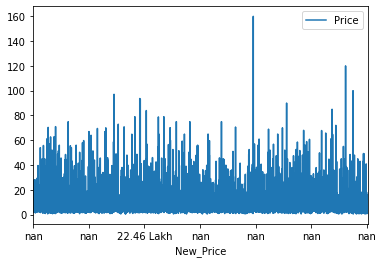

In [15]:
from pandas import DataFrame
  
df = DataFrame(data,columns=['New_Price','Price'])
df.plot(x ='New_Price', y='Price', kind = 'line')

Ploted the graph of <b>Mileage</b> with the <b>Seats</b> used <b>.plot</b> function to plot graph in pandas module to plot line graph used kind as <b>line</b> and on <b>x axis</b> taken <b>Mileage</b> and on <b>y axis</b> taken <b>Seats</b>.

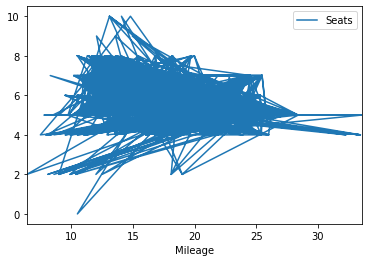

In [16]:
from pandas import DataFrame
  
df = DataFrame(data,columns=['Mileage','Seats'])
df.plot(x ='Mileage', y='Seats', kind = 'line')

Ploted the graph of <b>New_Price</b> with the <b>Power</b> used <b>.plot</b> function to plot graph in pandas module to plot line graph used kind as <b>line</b> and on <b>x axis</b> taken <b>New_Price</b> and on <b>y axis</b> taken <b>Power</b>.

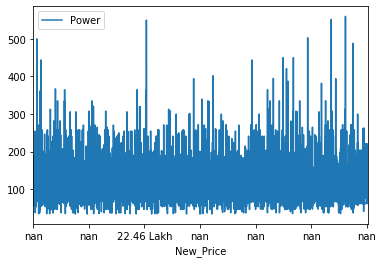

In [17]:
from pandas import DataFrame
  
df = DataFrame(data,columns=['New_Price','Power'])
df.plot(x ='New_Price', y='Power', kind = 'line')

Ploted the graph of <b>New_Price</b> with the <b>Power</b> used <b>.plot</b> function to plot graph in pandas module to plot line graph used kind as <b>line</b> and on <b>x axis</b> taken <b>New_Price</b> and on <b>y axis</b> taken <b>Power</b>.

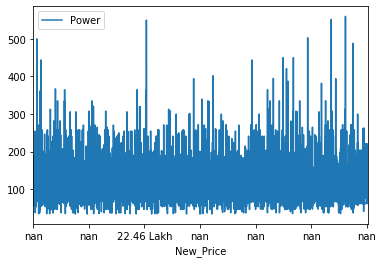

In [18]:
from pandas import DataFrame
  
df = DataFrame(data,columns=['New_Price','Power'])
df.plot(x ='New_Price', y='Power', kind = 'line')

finally after trying to impute, if still any null values are left, then simply droped the rows.

In [19]:
data.dropna(axis=0, subset=['Power','Mileage',], inplace=True)
data.index = range(data.shape[0])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 16 columns):
Name                 6005 non-null object
Location             6005 non-null object
Year                 6005 non-null int64
Kilometers_Driven    6005 non-null int64
Fuel_Type            6005 non-null object
Transmission         6005 non-null int64
Owner_Type           6005 non-null int64
Mileage              6005 non-null float64
Engine               6005 non-null float64
Power                6005 non-null float64
Seats                6005 non-null float64
New_Price            823 non-null object
Price                6005 non-null float64
Brand                6005 non-null object
Car_Name             6005 non-null object
Model                6005 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 750.7+ KB


Added <b>custom features</b> for highend cars for all brands.

In [21]:
List_Brands = list(data['Brand'].value_counts().index)
Effective_brands = []

for i in List_Brands:
    data[i +'_Highend'] = data[['Brand', 'Price']].apply(lambda x : 1 if ((x['Brand']==i) & (x['Price'] > 35.0)) else 0, axis=1)
    if bool(list(data[i+'_Highend'].value_counts().index) == [0]):
        data.drop(i + '_Highend', axis=1, inplace=True)
    else:
        Effective_brands.append(i)

## <u>encoding :

In [22]:
from sklearn import preprocessing
data_brand = data['Brand']
encoder = preprocessing.LabelEncoder()
encoder.fit(data_brand)
data['Brand'] = encoder.transform(data_brand)

data_carname = data['Car_Name'] 
encoder.fit(data_carname)
data['Car_Name'] = encoder.transform(data_carname)

data_fuel = data['Fuel_Type']
encoder.fit(data_fuel)
data['Fuel_Type'] = encoder.transform(data_fuel)

data_model = data['Model']
encoder.fit(data_model)
data['Model'] = encoder.transform(data_model)

<i><u>one hot encoding.

In [23]:
location = pd.get_dummies(data['Location'])
data = pd.concat([data, location], axis=1)

In [24]:
data_num = data.drop(['Name','New_Price','Price', 'Location','Fuel_Type'], axis=1)
data_labels = data['Price']

<i><u>feature scaling.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final = scaler.fit_transform(data_num)

data_final = pd.DataFrame(data_final, columns=data_num.columns)

data_num = data_final

<i><u>applying LinearRegression to the data to perform linear regression<i><u>.

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_num, data_labels)

from sklearn.metrics import mean_squared_error
lin_predictions = lin_reg.predict(data_num)

lin_mse = mean_squared_error(data_labels,lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


4.328856785318259


<i><u>Applying Decision tree Regressor.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_num, data_labels)

from sklearn.metrics import mean_squared_error
tree_predictions = tree_reg.predict(data_num)

tree_mse = mean_squared_error(data_labels,tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.020483199861040302

<i><u>Checking for overfitting in Decision Tree.

In [28]:
<i><u>from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,data_num,data_labels,scoring="neg_mean_squared_error",cv=10) 
tree_rmse_scores=np.sqrt(-scores)

def display_scores(scores): 
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_scores(tree_rmse_scores)

Scores: [4.31320755 5.63368293 4.34080125 4.42858443 2.93935755 4.48067713
 6.17319741 6.23431651 4.2890208  6.21773035]
Mean: 4.905057589881102
Standard deviation: 1.046345432858341


<i><u>Applying Random Forest Regressor.

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_num,data_labels) 

scores=cross_val_score(forest_reg,data_num,data_labels,scoring="neg_mean_squared_error",cv=10) 
display_scores(np.sqrt(-scores))

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [3.3663848  2.69340928 2.85453995 4.16644143 3.3411483  3.99868982
 4.67370209 3.11037143 3.7928971  5.22436149]
Mean: 3.722194568971317
Standard deviation: 0.7679859291212765


<i><u>Applying Grid Search CV.

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[30,50,70],'max_features':[10,12]},{'bootstrap':[False],'n_estimators':[30,50],'max_features':[10,12,14]},]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(data_num, data_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [10, 12],
    

In [31]:
cvres=grid_search.cv_results_ 
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]): 
    print(np.sqrt(-mean_score),params) 

3.5228945341252564 {'max_features': 10, 'n_estimators': 30}
3.5353681747986494 {'max_features': 10, 'n_estimators': 50}
3.458813364829963 {'max_features': 10, 'n_estimators': 70}
3.5915953151346334 {'max_features': 12, 'n_estimators': 30}
3.5565772882511157 {'max_features': 12, 'n_estimators': 50}
3.4710150292513027 {'max_features': 12, 'n_estimators': 70}
3.4975237318033456 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
3.4457575004470544 {'bootstrap': False, 'max_features': 10, 'n_estimators': 50}
3.526327646927183 {'bootstrap': False, 'max_features': 12, 'n_estimators': 30}
3.54844462344194 {'bootstrap': False, 'max_features': 12, 'n_estimators': 50}
3.6067952245599546 {'bootstrap': False, 'max_features': 14, 'n_estimators': 30}
3.5332204077617924 {'bootstrap': False, 'max_features': 14, 'n_estimators': 50}


<i><u>Ploted a graph feature importances on all columns to get Relativr importance sbout it.

Text(0.5, 0, 'Relative Importance')

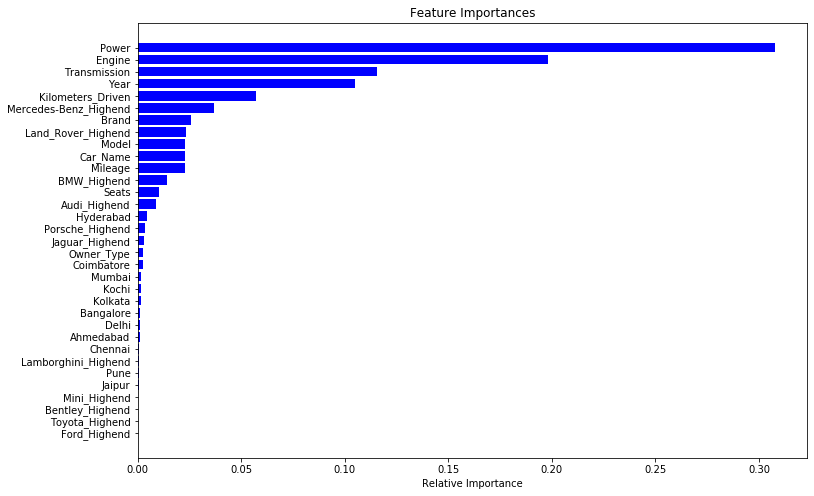

In [32]:
features=data_num.columns
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.subplots(1, figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

<i><u>Used grid search on the <b>model</b> column in the data.

In [33]:
model = grid_search.best_estimator_
predictions = model.predict(data_num)

mse = mean_squared_error(predictions, data_labels)

rmse = np.sqrt(mse)
rmse

0.020483199861040302

<i>modified the columns <b>Brand, car_Name</b> and <b>Model</b> using <b>list, .apend, .series</b>(from pandas).

In [34]:
Name = list(test_data['Name'])
Brand = []
Car_Name = []
Model = []

for i in range(len(Name)):
    if 'Range Rover' in Name[i]:
        Name[i] = Name[i].replace('Range Rover','Range_Rover')
    if 'Land Rover' in Name[i]:
        Name[i] = Name[i].replace('Land Rover', 'Land_Rover')
    if ' Series' in Name[i]:
        Name[i] = Name[i].replace(' Series', 'Series')
    if ' New' in Name[i]:
        Name[i] = Name[i].replace(' New','')
    if ' Class' in Name[i]:
        Name[i] = Name[i].replace(' Class','-Class')
    if 'Wagon R' in Name[i]:
        Name[i] = Name[i].replace('Wagon R', 'WagonR')

    i = Name[i]
    i = i.split(' ',2)
    Brand.append(i[0])
    Car_Name.append(i[1])
    if len(i) == 2:
        i.append('Lxi')
    Model.append(i[2])
        
    
Brand = pd.Series(Brand)
Car_Name = pd.Series(Car_Name)
Model = pd.Series(Model)

test_data['Brand'] = Brand
test_data['Car_Name'] = Car_Name
test_data['Model'] = Model

In [35]:
current_year = 2020
test_data['Year'] = current_year - test_data['Year']

Modified the columns <b>Transmission</b> and <b>Owner_type</b> using <b>Dict_t, Divt_o and .series</b>(from pandas).

In [36]:
Transmission = list(test_data['Transmission'])
Owner_Type = list(test_data['Owner_Type'])
Dict_t = {'Automatic':1, 'Manual':0}
Dict_o = {'First':1, 'Second':2, 'Third':3, 'Fourth & Above':4}
for i in range(len(Transmission)):
    t = Transmission[i]
    o = Owner_Type[i]
    
    Transmission[i] = Dict_t[t]
    Owner_Type[i] = Dict_o[o]
    
test_data['Transmission'] = pd.Series(Transmission)
test_data['Owner_Type'] = pd.Series(Owner_Type)

Modified the columns <b>Mileage</b> and <b>Fuel_Type</b> using <b>.replace and .strip</b> functions.

In [37]:
Mileage = list(test_data['Mileage'])
Fuel_Type = test_data['Fuel_Type']

for i in range(len(Mileage)):
    if 'CNG' in Fuel_Type[i] or 'LPG' in Fuel_Type[i] :
        Mileage[i] = Mileage[i].replace('km/kg','')
        Mileage[i] = Mileage[i].strip()
        Mileage[i] = float(Mileage[i])
        
    if 'Petrol' in Fuel_Type[i] or 'Diesel' in Fuel_Type[i]:
        Mileage[i] = Mileage[i].replace('kmpl','')
        Mileage[i] = Mileage[i].strip()
        Mileage[i] = float(Mileage[i])
    
test_data['Mileage'] = Mileage

Modified the columns <b>engine</b> and <b>power</b> using <b>.replace</b> function.

In [38]:
engine = list(test_data['Engine'])
power = list(test_data['Power'])

for i in range(len(engine)):
    if 'CC' in str(engine[i]):
        engine[i] = engine[i].replace(' CC','')
        engine[i] = float(engine[i])
    if power[i] == 'null bhp':
        power[i] = 0.0
    if 'bhp' in str(power[i]):
        power[i] = power[i].replace(' bhp','')
        power[i] = float(power[i])
test_data['Engine'] = engine
test_data['Power'] = power

In [39]:
for i in Effective_brands:
    test_data[i +'_Highend'] = test_data[['Brand','New_Price']].apply(lambda x : 1 if (x['Brand']==i) else 0, axis=1)

Imported <b>preprocessing</b> from <b>sklearn</b> and modified <b>brand, car name, fuel and model</b> using <b>.fit and .transfer</b> from encoder.

In [40]:
from sklearn import preprocessing
data_brand = test_data['Brand']
encoder = preprocessing.LabelEncoder()
encoder.fit(data_brand)
test_data['Brand'] = encoder.transform(data_brand)

data_carname = test_data['Car_Name'] 
encoder.fit(data_carname)
test_data['Car_Name'] = encoder.transform(data_carname)

data_fuel = test_data['Fuel_Type']
encoder.fit(data_fuel)
test_data['Fuel_Type'] = encoder.transform(data_fuel)

data_model = test_data['Model']
encoder.fit(data_model)
test_data['Model'] = encoder.transform(data_model)

In [41]:
location = pd.get_dummies(test_data['Location'])
test_data = pd.concat([test_data, location], axis=1)

<i>Dropped the data from Name, New price, Location and Fuel type.

In [42]:
test_data_num = test_data.drop(['Name','New_Price', 'Location','Fuel_Type'], axis=1)

<i><u>Checked the data using .info function.

In [43]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 33 columns):
Year                     1234 non-null int64
Kilometers_Driven        1234 non-null int64
Transmission             1234 non-null int64
Owner_Type               1234 non-null int64
Mileage                  1234 non-null float64
Engine                   1224 non-null float64
Power                    1224 non-null float64
Seats                    1223 non-null float64
Brand                    1234 non-null int32
Car_Name                 1234 non-null int32
Model                    1234 non-null int32
Toyota_Highend           1234 non-null int64
Mercedes-Benz_Highend    1234 non-null int64
Ford_Highend             1234 non-null int64
BMW_Highend              1234 non-null int64
Audi_Highend             1234 non-null int64
Land_Rover_Highend       1234 non-null int64
Jaguar_Highend           1234 non-null int64
Mini_Highend             1234 non-null int64
Porsche_Highend          1234 

In [44]:
test_data_num.fillna(0.0, inplace=True)

In [45]:
model.predict(test_data_num)

array([29.678 , 29.678 , 29.678 , ..., 29.678 , 35.7022, 34.4822])

# <b><i><u>Inference :

We will conclude the whole analysis sequentially; in the order the graphs are
plotted.

we checked the given data for the duplicate values and then then we fixed the
names in order to get in order to get proper brand names, car names and
model names. Then we added three new features to the data - &#39;Brand&#39;, &#39;Car
Name&#39;, &#39;Model&#39;. Converted the year column into how old the car is by
subtracting it from the current year
Converted transmission into binary type and converted owner type into
numerical data. After that cleaned mileage column and identified where the
values are 0.0. Then cleaned engine and power columns and identified where
the value is null bhp in power. Next, we checked for similar cars in not-null
dataset and

1) Started filling null vales of power and engine with it.<br>
2) Filled null values of mileage with it.<br>
3) Started filling null values of seats with it.<br>
The data of engine, mileage, seats, power is plotted in the graph. Firstly,
we plotted the graph of old-price vs new-price. And then the second graph
was of seating capacity according to the price of the cars. And the last graph
was of power of the cars according to the price of cars.
Finally, after trying to impute, we still remained with the null values then
we simply dropped those rows. After that we added custom features for
highend cars for all brands. Then we encoded the labels of all cars according to
their Brand, Car-type, Fuel Capacity, Seating Capacity, Fuel type, Model, etc.
Then we applied different statistical approach for modelling
relationship between dependent variables such as linear regression, decision tree
regressor. After that we checked for overfitting in decision tree and at the last we
applied the random forest regressesors.

Thank you for giving us such great opportunity. We enjoyed a lot while
working with this type of project and team members. The overall experience was
great. Once again thank you so much for this kind of great opportunity.